<a href="https://colab.research.google.com/github/voilszee/kelompok-11-apm/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
import seaborn as sns
plt. rcParams["figure.figsize"] = (10,6)

data = pd.read_csv('mobile.csv')
data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


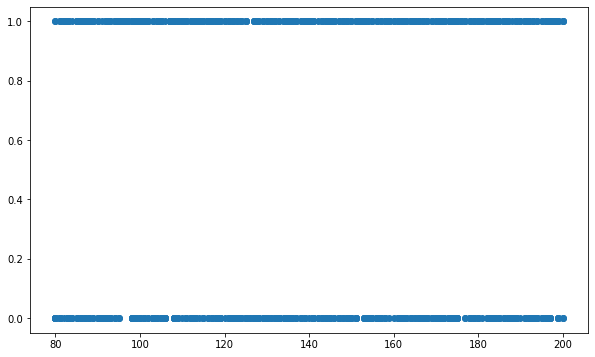

In [5]:
plt.scatter(data['mobile_wt'], data['dual_sim'])
plt.show()

X_train, X_test, y_train, y_test = train_test_split(data['mobile_wt'], data['dual_sim'])

In [14]:
def normalize(X):
  return X - X.mean()

def predict(X, b0, b1):
  return np.array([1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

def logistic_regression(X,Y):
    X = normalize(X)

    b0 = 0
    b1 = 0
    L = 0.001
    epochs = 300

    for epoch in range(epochs):
      y_pred = predict(X, b0, b1)
      D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))
      D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))
      b0 = b0 - L * D_b0
      b1 = b1 - L * D_b1

    return b0, b1 

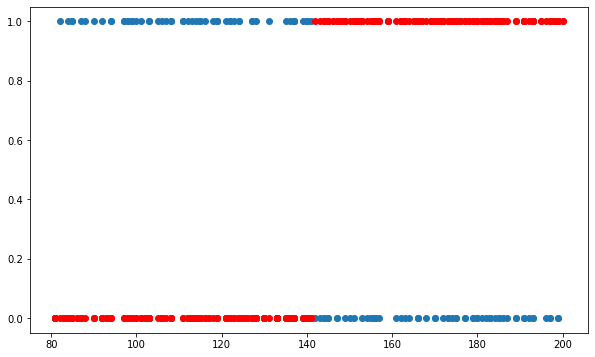

Accuracy = 0.504


In [15]:
b0, b1 =  logistic_regression(X_train, y_train)

X_test_norm = normalize(X_test)
y_pred = predict(X_test_norm, b0, b1)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, c ="red")
plt.show()

accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.iloc[i]:
      accuracy += 1
print(f"Accuracy = {accuracy / len(y_pred)}")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


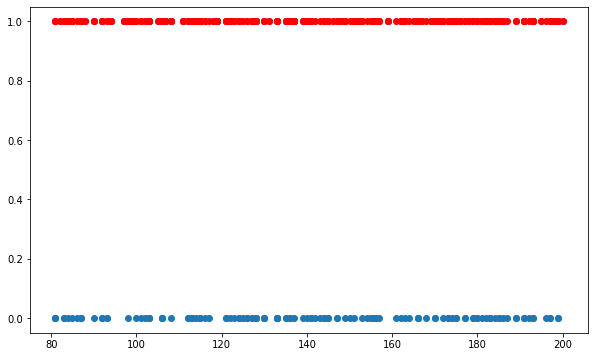

Accuracy = 0.476


In [20]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train.values.reshape(-1,1), y_train.values.reshape(-1,1))

y_pred_sk = lr_model.predict(X_test.values.reshape(-1,1))
plt.clf()
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred_sk, c="red")
plt.show()

print(f"Accuracy = {lr_model.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))}")